In [1]:
import edoxrd as xrd
import peakutils as pk
import edoxrd as xrd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

/users/zatterin/Envs/py2/local/lib/python2.7/site-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [12]:
data_dir = '/users/zatterin/Documents/data/XRD/e16014/'
rep_dir = '/users/zatterin/Documents/report/img/'

In [13]:
data = !ls {data_dir} | grep ras | grep t2t
for index, fname in enumerate(data): 
    print(str(index)+'...'+fname)

0...e16014_02_t2t_001.ras
1...e16014_05_t2t_001_0.1mm.ras
2...e16014_06_t2t_001_rs0.2mm.ras
3...e16014_07_t2t_001.ras
4...e16014_09_t2t_002.ras
5...e16014_10_t2t_003.ras
6...e16014_10_t2t_004.ras
7...e16014_11_t2t_004.ras
8...e16014_t2t.ras


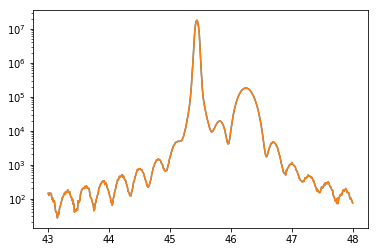

In [15]:
plt.plot(*xrd.read_data(data[4],data_dir));plt.yscale('log');plt.show()

#### Estimate out-of-plane lattice parameter 

In [20]:
dset = data[4]

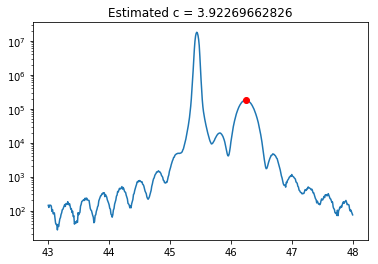

In [21]:
xdata, ydata = xrd.read_data(dset,data_dir,comments='*')
idxs = pk.indexes(ydata, thres=1e-6, min_dist=10)
film_peak = ydata[idxs].argsort()[::-1][1]
plt.plot(xdata,ydata)
plt.plot(xdata[idxs][film_peak],ydata[idxs][film_peak],'o',c='red'); plt.yscale('log')
c = 1/((2/1.5406) * np.sin(np.deg2rad(xdata[idxs][film_peak]/2)))
c = c*2
plt.title('Estimated c = {0}'.format(c)) # change multiplier depending on order of reflection!
plt.show()

#### Estimate thickness from Laue oscillations:

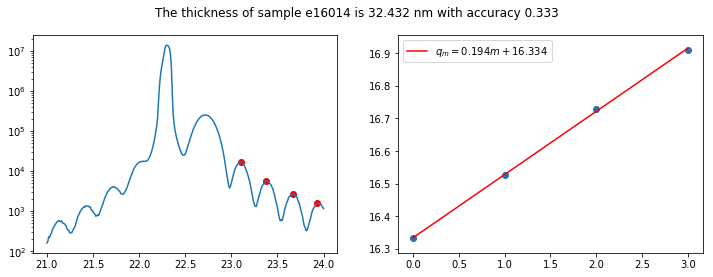

In [23]:
dset = data[0]
t = xrd.calc_thickness(dset, data_dir, threshold=1e-6, distance=20, side='r', comm='*')

#### Simulate starting from previous results:

In [25]:
dset = data[4]

In [28]:
@interact(sub='KTO', film='PTO', Nfilm=(0,600,0.1), c_film=(3.901, 4.201, 0.001), sc=(1e5,1e8,1e6),
         continuous_update=False)
def plt_ctr(sub, film, Nfilm=t/(0.1*c), c_film=c, sc=1e11):
    xdata, I = xrd.calc_ctr(dset, data_dir, sub, film, Nfilm, c_film, scale=sc, comm='*')
    plt.figure(figsize=(10,6))
    plt.plot(*xrd.read_data(dset,data_dir,comments='*'), label='Obs')
    plt.plot(xdata, I.real, label='Calc')
    plt.yscale('log')
    plt.ylabel(r'$I$ [cnts]')
    plt.xlabel(r'$2\theta$')
    plt.legend()
    plt.title('Film thickness: {0} nm \n Film out-of-plane parameter: {1} A \n Scale: {2}'\
              .format(Nfilm*c_film/10, c_film, sc), fontsize=9)
    plt.show()